In [20]:
import tensorflow_datasets as tfds
import numpy as np 
import tensorflow as tf

In [21]:
dataset = tfds.load('cifar100', split = 'train')

In [22]:
for data in dataset.take(1):
    print(data['image'].shape)
    print(data['label'])

(32, 32, 3)
tf.Tensor(66, shape=(), dtype=int64)


2022-09-14 04:57:43.474886: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [26]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
(x_train, y_train), (x_test, y_test) = mnist
x_train.shape

(60000, 28, 28)

In [29]:
import matplotlib.pylab as plt
def plot_img(data, idx):
    plt.figure(figsize = (5,5))
    plt.imshow(data[idx], cmap = 'gray')
    plt.axis('off')
    plt.show()

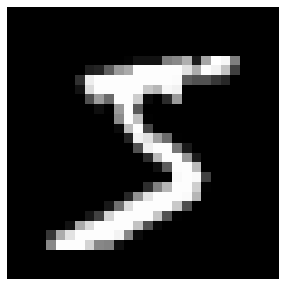

In [31]:
plot_img(x_train, 0)

In [38]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape

(60000, 28, 28)

In [41]:
x_train[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [44]:
x_train_in = x_train[...,tf.newaxis]
x_test_in = x_test[..., tf.newaxis]

In [47]:
# 값 확인 (x_train, x_test 채널 한개 추가)
print(x_train_in.shape)
print(x_test_in.shape) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train_in, y_train, validation_data=(x_test_in, y_test), epochs = 10)

Epoch 1/10


2022-09-14 05:29:07.315115: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-09-14 05:29:08.484649: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2092 - accuracy: 0.9409 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0794 - accuracy: 0.9772 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0601 - accuracy: 0.9821 - val_loss: 0.0599 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0533 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0492 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0520 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0497 - val_accuracy: 0.9850
Epo

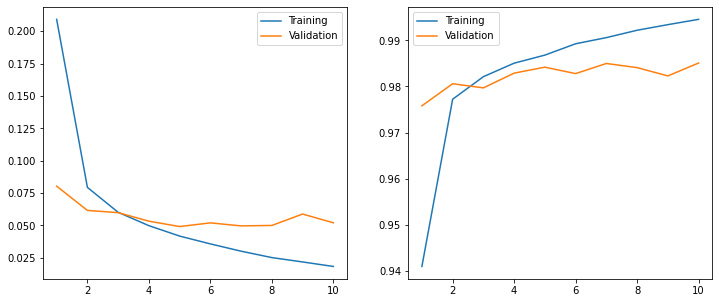

In [53]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    ax[0].plot(range(1, epoch +1), loss, label = 'Training')
    ax[0].plot(range(1, epoch +1), val_loss, label = 'Validation')
    ax[0].legend()
    
    ax[1].plot(range(1, epoch +1), acc, label = 'Training')
    ax[1].plot(range(1, epoch +1), val_acc, label = 'Validation')
    ax[1].legend()
    plt.show()
    
plot_loss_acc(history, 10)